In [14]:
%matplotlib inline
import matplotlib.pyplot as mpl
from pathlib import Path
import pylibrary.plotting.plothelpers as PH
import matplotlib.image as mpimg
import numpy as np

fn = Path('/Users/pbmanis/Desktop/Python/VCN-SBEM-Data/VCN-CellImages-1-2020/Bushy_Cells')

fns = fn.glob('*.png')
pngs = sorted(list(fns))
npngs = len(pngs)
print(npngs)

27


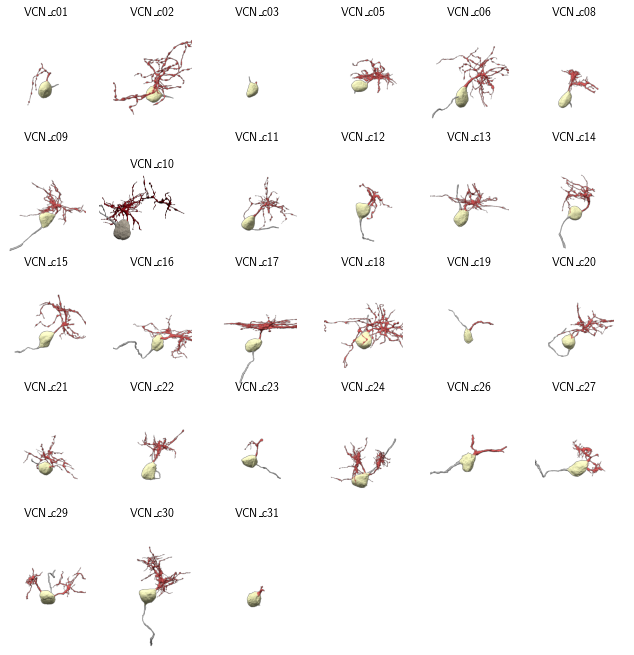

In [18]:
rows, cols = PH.getLayoutDimensions(npngs)
P = PH.regular_grid(rows, cols, order='rowsfirst', figsize=(10.0, 10.0), 
                    showgrid=False, verticalspacing=0.00, horizontalspacing=0.00, 
                    margins={'bottommargin': 0.1, 'leftmargin': 0.07, 'rightmargin': 0.05, 'topmargin': 0.03}, 
                    labelposition=(0.0, 0.0), parent_figure=None, panel_labels=None, )

# PH.show_figure_grid(P.figure_handle)
ext = 100
axarray = P.axarr.ravel()
for i, p in enumerate(pngs):
    img=mpimg.imread(str(p))
    axarray[i].imshow(img,  aspect='equal')
    axarray[i].set_title(str(p.name).replace('_', '\_').replace('.png', ''))
    ylim = axarray[i].get_ylim()
#     print('xlim: ', ylim)
# xlim for these ata are 0, 2500
    if 'c10' in str(p):
        axarray[i].set_xlim(200, 2000)
    else:
        axarray[i].set_xlim(800, 1700)
#     axarray[i].set_ylim(1200, 300)
    
    PH.noaxes(axarray[i])
for j in range(i, rows*cols):
    PH.noaxes(axarray[j])
mpl.savefig('allVCNcells.pdf')
mpl.show()